In [1]:
import sys
print(sys.executable)

/usr/local/opt/python/bin/python3.7


In [2]:
%%bash
/usr/local/opt/python/bin/pip3 install torch torchvision

In [3]:
from __future__ import print_function

import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
import torch
from torch.autograd import Variable
from torch.nn import Linear, Module, MSELoss
from torch.optim import SGD
import numpy as np
import torch.nn as nn

%matplotlib inline

In [4]:
# Test torch
x = torch.empty(5, 3)
print(x)
print(torch.rand(5, 3), torch.zeros(5, 3, dtype=torch.long), torch.tensor([5.5, 3]))
x=x.new_ones(5, 3, dtype=torch.double)  
print(x)
x=(torch.randn_like(x, dtype=torch.float) )
print(x)
y=torch.rand(5, 3)
print(x+y)
result = torch.empty(5, 3)
torch.add(x, y, out=result)
print(result)

tensor([[1.1210e-44, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 1.4013e-45],
        [1.8754e+28, 6.3455e-10, 2.6659e-09],
        [1.2915e-11, 1.3162e+22, 2.1954e-04],
        [1.7153e-07, 1.6131e-07, 5.3976e-05]])
tensor([[0.9187, 0.7178, 0.9453],
        [0.2186, 0.8341, 0.5872],
        [0.0583, 0.1870, 0.6953],
        [0.0229, 0.2915, 0.8555],
        [0.0551, 0.8245, 0.5920]]) tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]) tensor([5.5000, 3.0000])
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)
tensor([[ 0.8145, -0.6981,  0.7702],
        [ 0.8680,  0.6051, -0.5778],
        [-2.3319,  0.1318,  0.2010],
        [-0.0801, -1.4546,  0.7128],
        [ 1.6878,  0.0945,  0.6428]])
tensor([[ 1.4298, -0.0108,  0.9901],
        [ 1.1762,  1.0067, -0.4911],
        [-1.7747,  0.1900,  1.0166],
        [ 0.5812, -1.2595,  1.6507],
        [ 1

In [8]:
class LinearRegressionModel(nn.Module):

    def __init__(self, input_dim, output_dim, n_h):

        super(LinearRegressionModel, self).__init__() 
        # Calling Super Class's constructor
        self.linear =nn.Sequential(nn.Linear(input_dim, n_h),
                     nn.ReLU(),
                     nn.Linear(n_h, n_h+n_h),
                     nn.Linear(n_h+n_h, output_dim),
                     nn.Linear(output_dim, output_dim),
                     nn.Sigmoid())
        #self.linear = nn.Linear(input_dim, output_dim)
        # nn.linear is defined in nn.Module

    def forward(self, x):
        # Here the forward pass is simply a linear function

        out = self.linear(x)
        return out

In [9]:
def generate_dataset(size = 100):
    # equation: y = a * b 
    inputs = []
    outputs = []
    for ix in range(size):
        random_number1 = np.random.randint(size) / size
        random_number2 = np.random.randint(size) / size
        inputs.append([random_number1, random_number2])
        outputs.append([ random_number1 * random_number2])
        #inputs.append([random_number1, random_number2])
        #outputs.append([ random_number1 * random_number2])
        
    return inputs, outputs

In [10]:
input_dim = 2
output_dim = 1
model = LinearRegressionModel(input_dim,output_dim, 10)
loss_function = nn.MSELoss()
l_rate = 0.01
optimiser = torch.optim.SGD(model.parameters(), lr = l_rate)
epochs = 2000
generate_dataset(20)
x_train, y = generate_dataset(3000)
print ( x_train[:5], y[:5])

[[0.115, 0.14833333333333334], [0.323, 0.647], [0.9256666666666666, 0.9723333333333334], [0.30666666666666664, 0.43266666666666664], [0.44766666666666666, 0.802]] [[0.017058333333333335], [0.208981], [0.9000565555555555], [0.13268444444444444], [0.35902866666666666]]


In [12]:

for epoch in range(epochs):
    epoch +=1
    #increase the number of epochs by 1 every time
    #clear grads as discussed in prev post    
    optimiser.zero_grad()    
    inputs = Variable(torch.Tensor(x_train))
    labels = Variable(torch.Tensor(y))
    #forward to get predicted values    
    outputs = model.forward(inputs)
    loss = loss_function(outputs, labels)
    loss.backward()# back props
    optimiser.step()# update the parameters
    print('epoch {}, loss {}'.format(epoch,loss.data))

epoch 1, loss 0.04446539282798767
epoch 2, loss 0.04446110874414444
epoch 3, loss 0.04445682093501091
epoch 4, loss 0.04445253312587738
epoch 5, loss 0.04444824159145355
epoch 6, loss 0.044443950057029724
epoch 7, loss 0.044439658522605896
epoch 8, loss 0.04443535953760147
epoch 9, loss 0.044431064277887344
epoch 10, loss 0.04442676529288292
epoch 11, loss 0.044422462582588196
epoch 12, loss 0.04441815987229347
epoch 13, loss 0.04441385716199875
epoch 14, loss 0.04440954700112343
epoch 15, loss 0.044405240565538406
epoch 16, loss 0.044400930404663086
epoch 17, loss 0.044396620243787766
epoch 18, loss 0.04439230635762215
epoch 19, loss 0.04438798874616623
epoch 20, loss 0.04438367113471031
epoch 21, loss 0.044379353523254395
epoch 22, loss 0.04437503218650818
epoch 23, loss 0.04437071084976196
epoch 24, loss 0.04436638578772545
epoch 25, loss 0.044362060725688934
epoch 26, loss 0.04435772821307182
epoch 27, loss 0.04435340315103531
epoch 28, loss 0.0443490706384182
epoch 29, loss 0.0443

epoch 282, loss 0.04318404570221901
epoch 283, loss 0.04317918047308922
epoch 284, loss 0.043174318969249725
epoch 285, loss 0.043169450014829636
epoch 286, loss 0.04316457733511925
epoch 287, loss 0.04315970465540886
epoch 288, loss 0.04315482825040817
epoch 289, loss 0.043149951845407486
epoch 290, loss 0.0431450717151165
epoch 291, loss 0.043140191584825516
epoch 292, loss 0.043135304003953934
epoch 293, loss 0.04313042014837265
epoch 294, loss 0.04312552884221077
epoch 295, loss 0.04312063753604889
epoch 296, loss 0.04311574250459671
epoch 297, loss 0.04311084747314453
epoch 298, loss 0.043105948716402054
epoch 299, loss 0.04310104623436928
epoch 300, loss 0.043096140027046204
epoch 301, loss 0.04309123754501343
epoch 302, loss 0.043086327612400055
epoch 303, loss 0.04308141767978668
epoch 304, loss 0.04307650029659271
epoch 305, loss 0.04307158291339874
epoch 306, loss 0.04306666553020477
epoch 307, loss 0.043061744421720505
epoch 308, loss 0.04305682331323624
epoch 309, loss 0.04

epoch 554, loss 0.041766226291656494
epoch 555, loss 0.041760630905628204
epoch 556, loss 0.041755031794309616
epoch 557, loss 0.04174943268299103
epoch 558, loss 0.04174382612109184
epoch 559, loss 0.04173821955919266
epoch 560, loss 0.041732609272003174
epoch 561, loss 0.04172699525952339
epoch 562, loss 0.04172137752175331
epoch 563, loss 0.04171575978398323
epoch 564, loss 0.04171013832092285
epoch 565, loss 0.041704509407281876
epoch 566, loss 0.0416988842189312
epoch 567, loss 0.041693251579999924
epoch 568, loss 0.04168761521577835
epoch 569, loss 0.04168197512626648
epoch 570, loss 0.04167633503675461
epoch 571, loss 0.04167069122195244
epoch 572, loss 0.04166504368185997
epoch 573, loss 0.0416593924164772
epoch 574, loss 0.04165373742580414
epoch 575, loss 0.04164808243513107
epoch 576, loss 0.04164242371916771
epoch 577, loss 0.04163676127791405
epoch 578, loss 0.04163109511137009
epoch 579, loss 0.04162542521953583
epoch 580, loss 0.04161975160241127
epoch 581, loss 0.041614

epoch 827, loss 0.040115807205438614
epoch 828, loss 0.04010926932096481
epoch 829, loss 0.04010273143649101
epoch 830, loss 0.040096186101436615
epoch 831, loss 0.04008963331580162
epoch 832, loss 0.040083084255456924
epoch 833, loss 0.04007652774453163
epoch 834, loss 0.04006996378302574
epoch 835, loss 0.04006339982151985
epoch 836, loss 0.04005683213472366
epoch 837, loss 0.040050260722637177
epoch 838, loss 0.04004368185997009
epoch 839, loss 0.04003709927201271
epoch 840, loss 0.04003051668405533
epoch 841, loss 0.04002392664551735
epoch 842, loss 0.04001733660697937
epoch 843, loss 0.040010739117860794
epoch 844, loss 0.04000413790345192
epoch 845, loss 0.03999753296375275
epoch 846, loss 0.039990924298763275
epoch 847, loss 0.039984311908483505
epoch 848, loss 0.03997769579291344
epoch 849, loss 0.03997107595205307
epoch 850, loss 0.039964448660612106
epoch 851, loss 0.03995782136917114
epoch 852, loss 0.03995119035243988
epoch 853, loss 0.03994455188512802
epoch 854, loss 0.03

epoch 1108, loss 0.038111574947834015
epoch 1109, loss 0.03810378909111023
epoch 1110, loss 0.038096003234386444
epoch 1111, loss 0.03808820992708206
epoch 1112, loss 0.03808040916919708
epoch 1113, loss 0.0380726084113121
epoch 1114, loss 0.03806480020284653
epoch 1115, loss 0.038056984543800354
epoch 1116, loss 0.03804916515946388
epoch 1117, loss 0.038041338324546814
epoch 1118, loss 0.038033511489629745
epoch 1119, loss 0.03802567720413208
epoch 1120, loss 0.03801783546805382
epoch 1121, loss 0.038009993731975555
epoch 1122, loss 0.0380021408200264
epoch 1123, loss 0.03799428418278694
epoch 1124, loss 0.037986427545547485
epoch 1125, loss 0.037978559732437134
epoch 1126, loss 0.03797069191932678
epoch 1127, loss 0.037962816655635834
epoch 1128, loss 0.03795493766665459
epoch 1129, loss 0.03794705122709274
epoch 1130, loss 0.0379391610622406
epoch 1131, loss 0.03793126717209816
epoch 1132, loss 0.03792336583137512
epoch 1133, loss 0.037915460765361786
epoch 1134, loss 0.037907551974

epoch 1383, loss 0.035767827183008194
epoch 1384, loss 0.03575851023197174
epoch 1385, loss 0.035749178379774094
epoch 1386, loss 0.03573984652757645
epoch 1387, loss 0.0357305109500885
epoch 1388, loss 0.03572116792201996
epoch 1389, loss 0.03571181371808052
epoch 1390, loss 0.03570245951414108
epoch 1391, loss 0.03569309413433075
epoch 1392, loss 0.03568372502923012
epoch 1393, loss 0.03567435219883919
epoch 1394, loss 0.03566497191786766
epoch 1395, loss 0.035655584186315536
epoch 1396, loss 0.03564618527889252
epoch 1397, loss 0.035636790096759796
epoch 1398, loss 0.03562738373875618
epoch 1399, loss 0.03561796993017197
epoch 1400, loss 0.035608548671007156
epoch 1401, loss 0.035599127411842346
epoch 1402, loss 0.03558969497680664
epoch 1403, loss 0.03558025509119034
epoch 1404, loss 0.035570815205574036
epoch 1405, loss 0.03556136414408684
epoch 1406, loss 0.03555190563201904
epoch 1407, loss 0.03554244711995125
epoch 1408, loss 0.03553297743201256
epoch 1409, loss 0.0355235040187

epoch 1666, loss 0.032874252647161484
epoch 1667, loss 0.03286313638091087
epoch 1668, loss 0.032852016389369965
epoch 1669, loss 0.03284088522195816
epoch 1670, loss 0.03282975032925606
epoch 1671, loss 0.03281860798597336
epoch 1672, loss 0.03280745819211006
epoch 1673, loss 0.03279630094766617
epoch 1674, loss 0.032785139977931976
epoch 1675, loss 0.03277396783232689
epoch 1676, loss 0.032762788236141205
epoch 1677, loss 0.032751601189374924
epoch 1678, loss 0.03274041414260864
epoch 1679, loss 0.03272922337055206
epoch 1680, loss 0.032718025147914886
epoch 1681, loss 0.03270682319998741
epoch 1682, loss 0.03269561380147934
epoch 1683, loss 0.03268439695239067
epoch 1684, loss 0.032673172652721405
epoch 1685, loss 0.032661937177181244
epoch 1686, loss 0.03265070170164108
epoch 1687, loss 0.032639455050230026
epoch 1688, loss 0.03262820467352867
epoch 1689, loss 0.03261694684624672
epoch 1690, loss 0.03260567784309387
epoch 1691, loss 0.032594405114650726
epoch 1692, loss 0.032583124

epoch 1946, loss 0.029522327706217766
epoch 1947, loss 0.029509538784623146
epoch 1948, loss 0.02949674241244793
epoch 1949, loss 0.029483938589692116
epoch 1950, loss 0.029471129179000854
epoch 1951, loss 0.029458314180374146
epoch 1952, loss 0.02944549359381199
epoch 1953, loss 0.029432661831378937
epoch 1954, loss 0.029419826343655586
epoch 1955, loss 0.02940698340535164
epoch 1956, loss 0.029394134879112244
epoch 1957, loss 0.029381277039647102
epoch 1958, loss 0.029368417337536812
epoch 1959, loss 0.029355546459555626
epoch 1960, loss 0.029342669993638992
epoch 1961, loss 0.02932978793978691
epoch 1962, loss 0.029316900297999382
epoch 1963, loss 0.029304003342986107
epoch 1964, loss 0.029291104525327682
epoch 1965, loss 0.02927819825708866
epoch 1966, loss 0.02926529198884964
epoch 1967, loss 0.02925238013267517
epoch 1968, loss 0.029239458963274956
epoch 1969, loss 0.02922653593122959
epoch 1970, loss 0.02921360172331333
epoch 1971, loss 0.029200663790106773
epoch 1972, loss 0.02

In [13]:

predicted =model.forward(inputs).data.numpy()

0.115 * 0.14833333333333334 = [0.017058333333333335] ~= [0.169813]
0.323 * 0.647 = [0.208981] ~= [0.23661539]
0.9256666666666666 * 0.9723333333333334 = [0.9000565555555555] ~= [0.40485895]
0.30666666666666664 * 0.43266666666666664 = [0.13268444444444444] ~= [0.215673]
0.44766666666666666 * 0.802 = [0.35902866666666666] ~= [0.2757439]
0.24 * 0.20666666666666667 = [0.0496] ~= [0.18888925]
0.41133333333333333 * 0.176 = [0.07239466666666666] ~= [0.2135952]
0.007666666666666666 * 0.6063333333333333 = [0.004648555555555555] ~= [0.178981]
0.6106666666666667 * 0.5293333333333333 = [0.3232462222222222] ~= [0.28412148]
0.06133333333333333 * 0.7066666666666667 = [0.04334222222222222] ~= [0.19484167]


Text(0.5, 0, 'y=a*b Label')

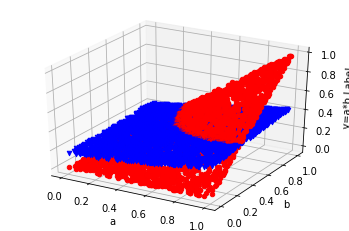

In [14]:

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(len(x_train)):
    xs = x_train[i][0]
    ys= x_train[i][1]
    ax.scatter(xs, ys, y[i], c='r', marker='o')
    ax.scatter(xs, ys, predicted[i], c='b', marker='v')
   
    if i < 10:
        print( xs, "*" ,ys,"=", y[i], "~=", predicted[i])

ax.set_xlabel('a ')
ax.set_ylabel('b ')
ax.set_zlabel('y=a*b Label')

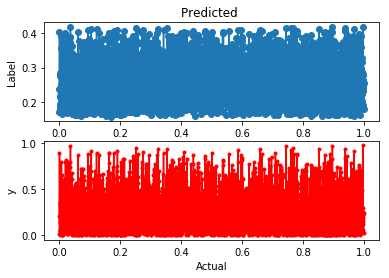

In [15]:
import numpy as np
import matplotlib.pyplot as plt


x1 = np.linspace(0.0, 1.0,3000)

y1 = y
y2 = predicted

plt.subplot(2, 1, 1)
plt.plot(x1, y2, 'o-')
plt.title('Predicted ')
plt.ylabel('Label')

plt.subplot(2, 1, 2)
plt.plot(x1, y1, '.-', c='r')
plt.xlabel('Actual')
plt.ylabel('y')

plt.show()

In [16]:
model.forward(Variable(torch.Tensor([2.0/100,2.0/100]))).data

tensor([0.1578])